# Important libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
inc=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
inc.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
inc.shape

(1000, 40)

Dataset has 1000 rows and 40 columns

In [5]:
inc.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
inc.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Statistical Summary

In [8]:
inc.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# Correlation Matrix

In [9]:
inc.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [10]:
inc.drop(['_c39'],axis=1,inplace=True)

# Correlation Matrix heatmap 

<AxesSubplot:>

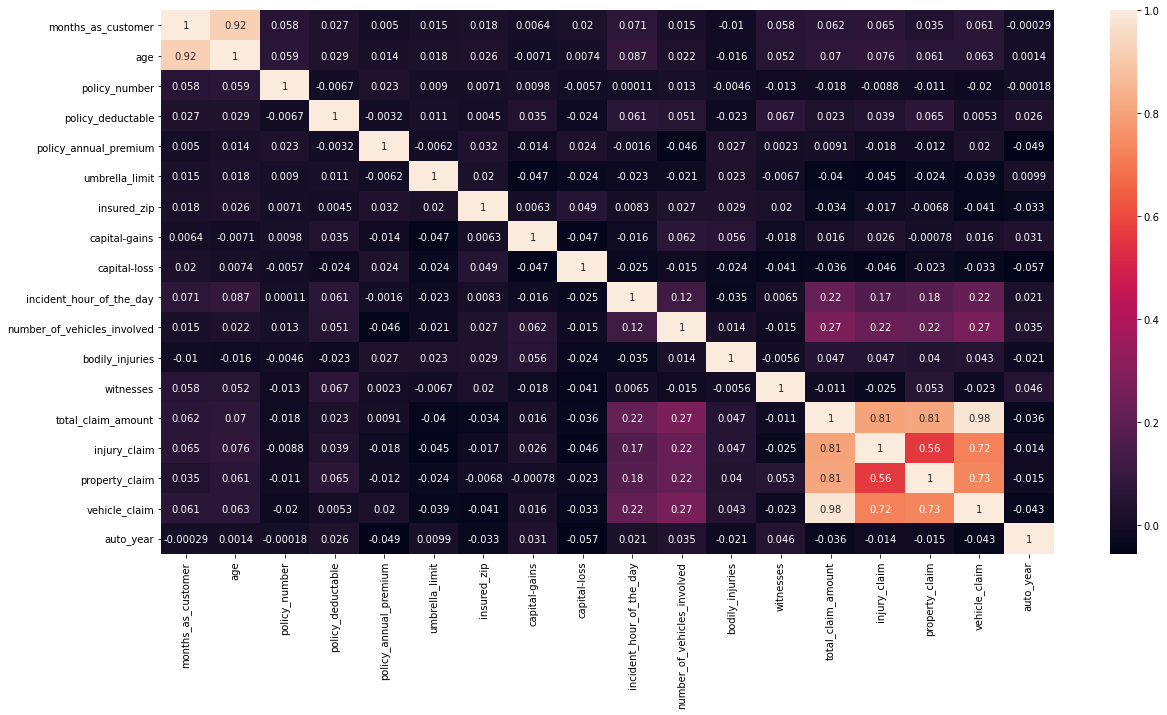

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(inc.corr(),annot=True,color='orange')

# Data Visalization

min price : N
max price: Y


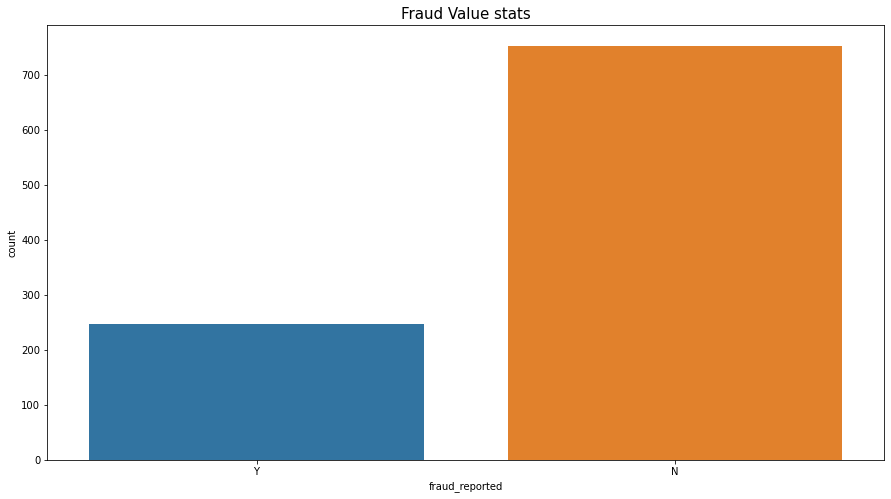

In [12]:
print('min price :',inc['fraud_reported'].min())
print('max price:',inc['fraud_reported'].max())
plt.figure(figsize=(15,8))
plt.title('Fraud Value stats',fontsize=15)
sns.countplot(inc['fraud_reported'], data=inc);

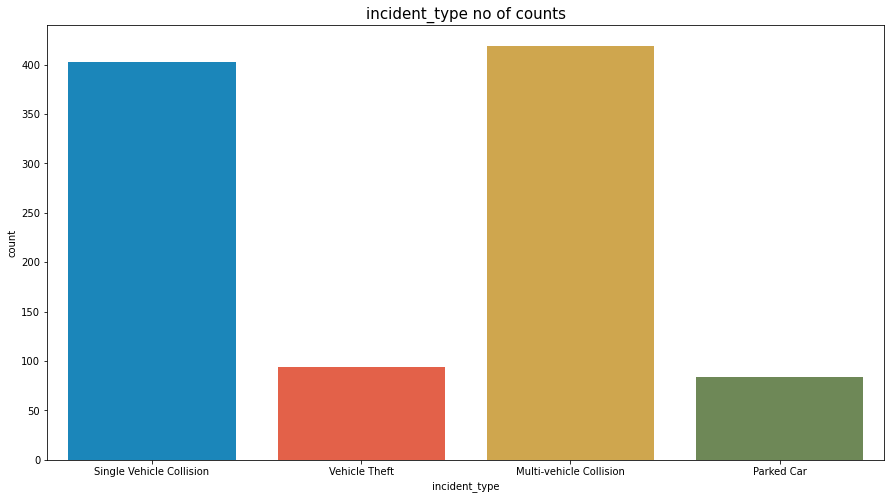

In [13]:
def value_count(inc,col):
    plt.figure(figsize=(15,8))
    plt.title(col+' no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(inc[col], data=inc)
value_count(inc,'incident_type')

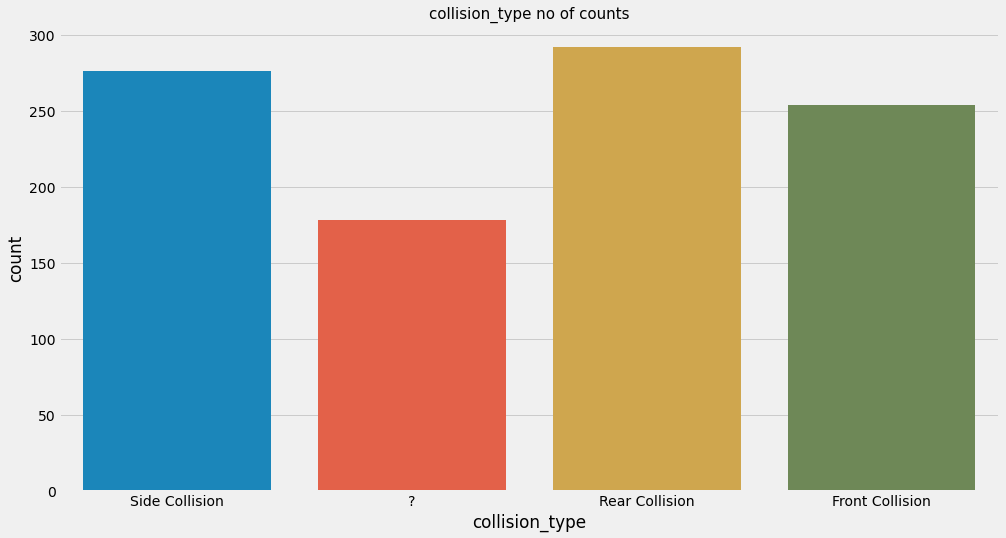

In [14]:
value_count(inc,'collision_type')

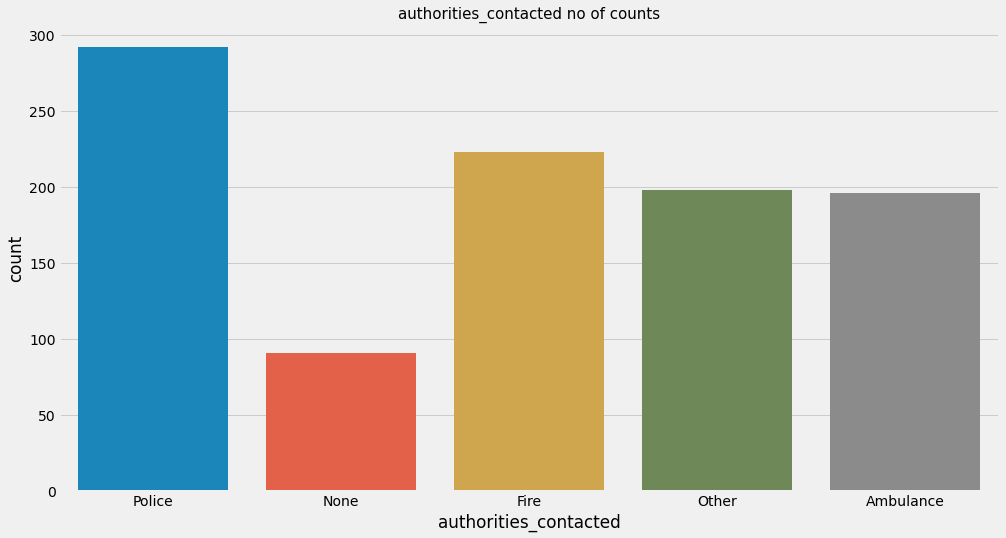

In [15]:
value_count(inc,'authorities_contacted')

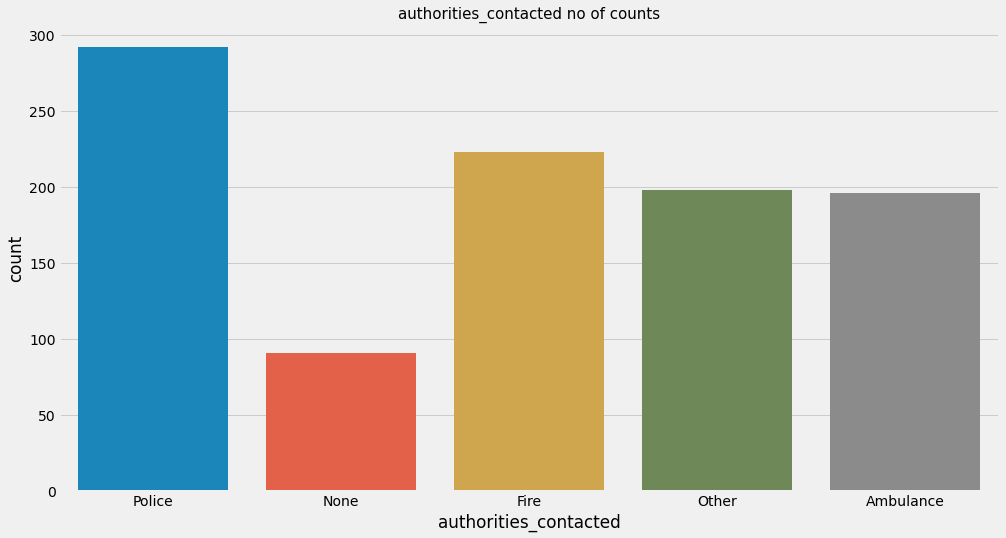

In [16]:
value_count(inc,'authorities_contacted')

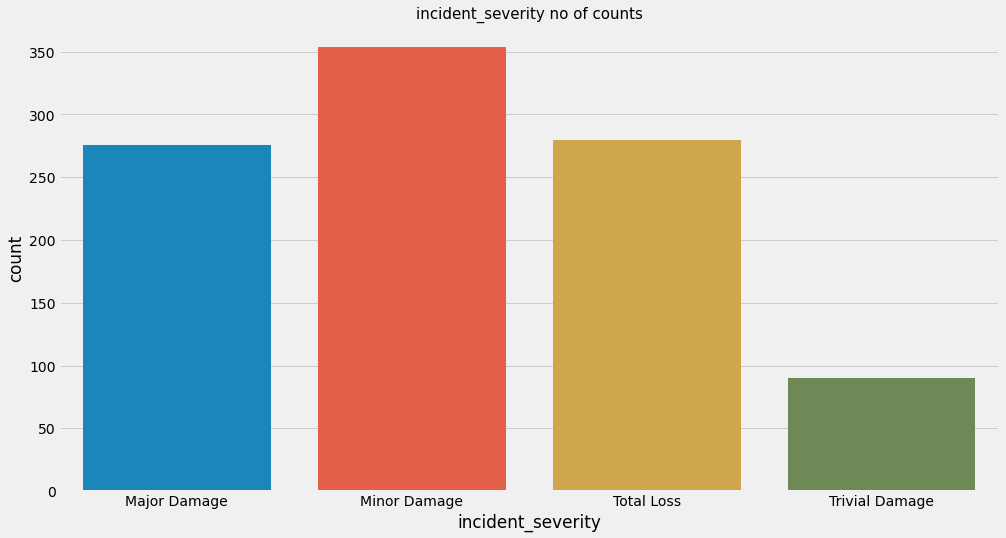

In [17]:
value_count(inc,'incident_severity')


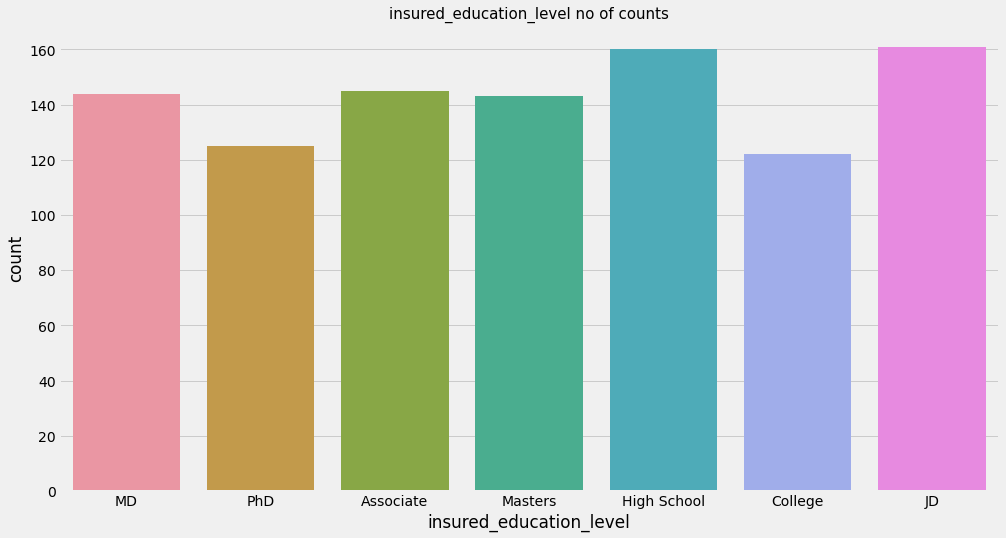

In [18]:
value_count(inc,'insured_education_level')

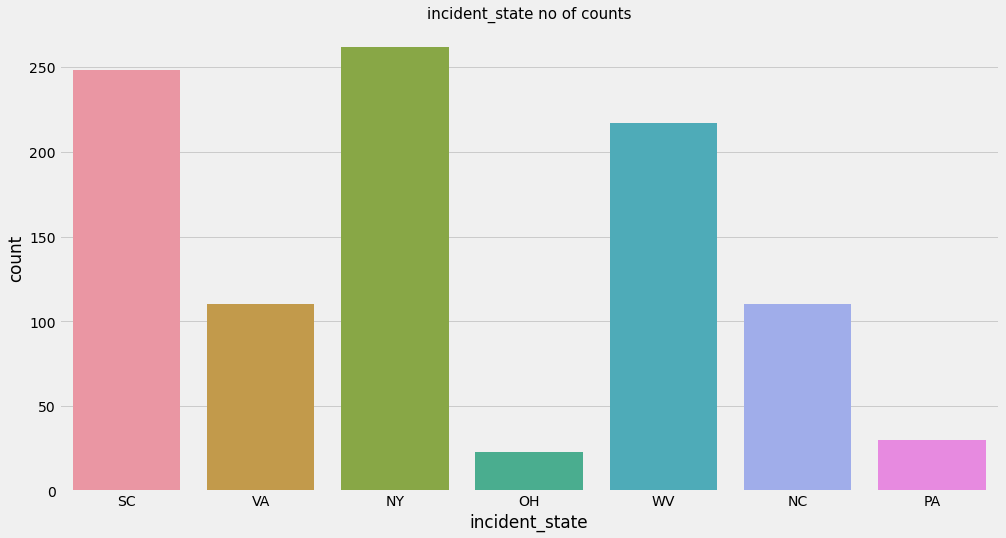

In [19]:
value_count(inc,'incident_state')

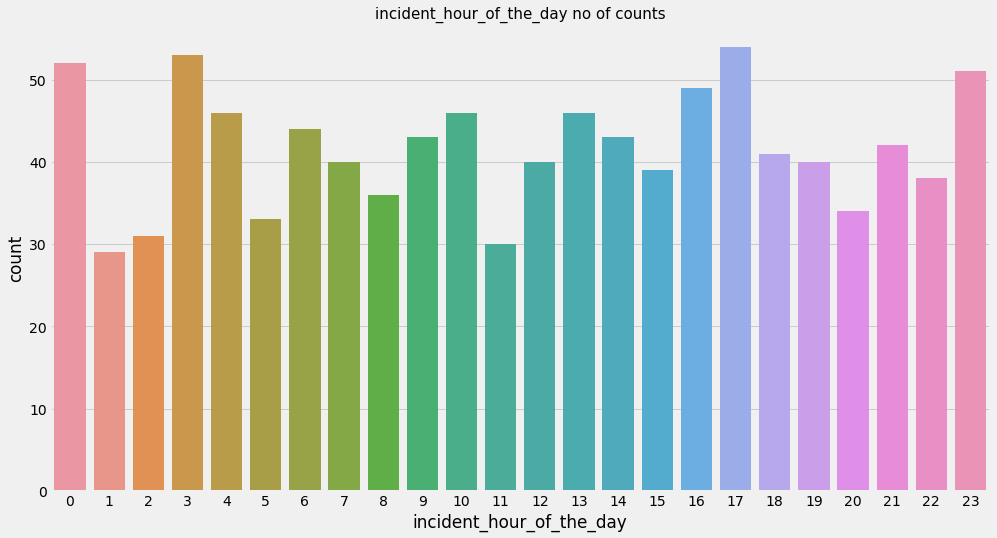

In [20]:
value_count(inc,'incident_hour_of_the_day')

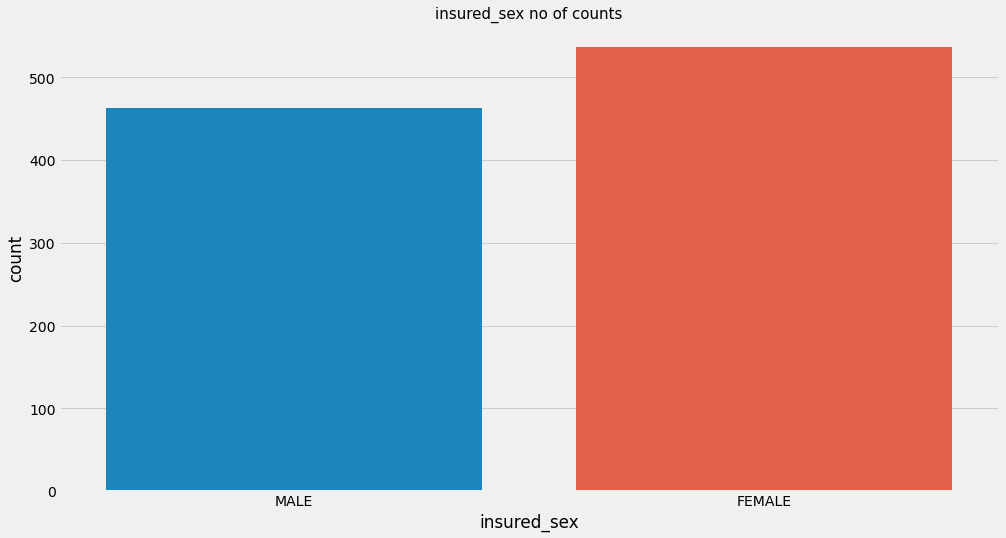

In [21]:
value_count(inc,'insured_sex')

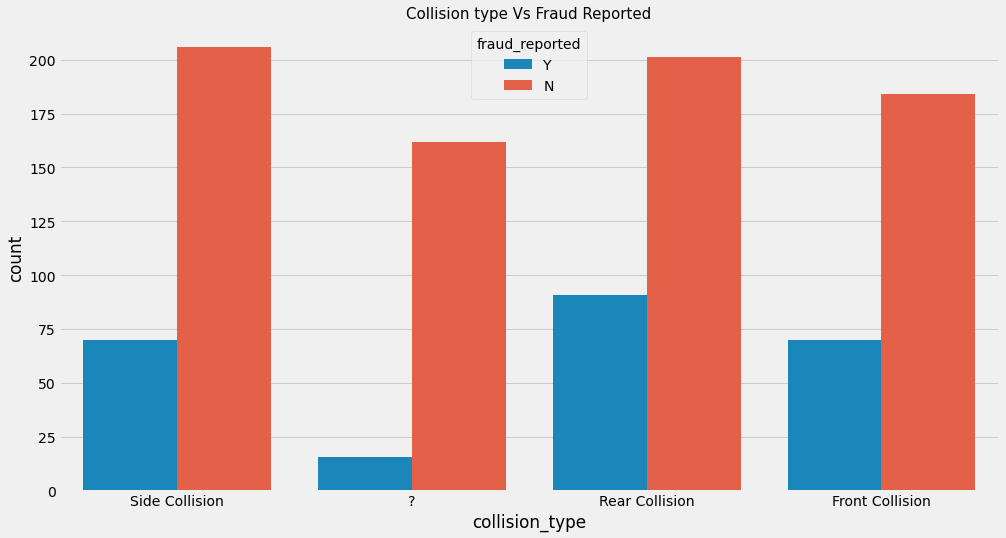

In [22]:
#Visualization with target columns
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(inc['collision_type'],hue='fraud_reported',data=inc);

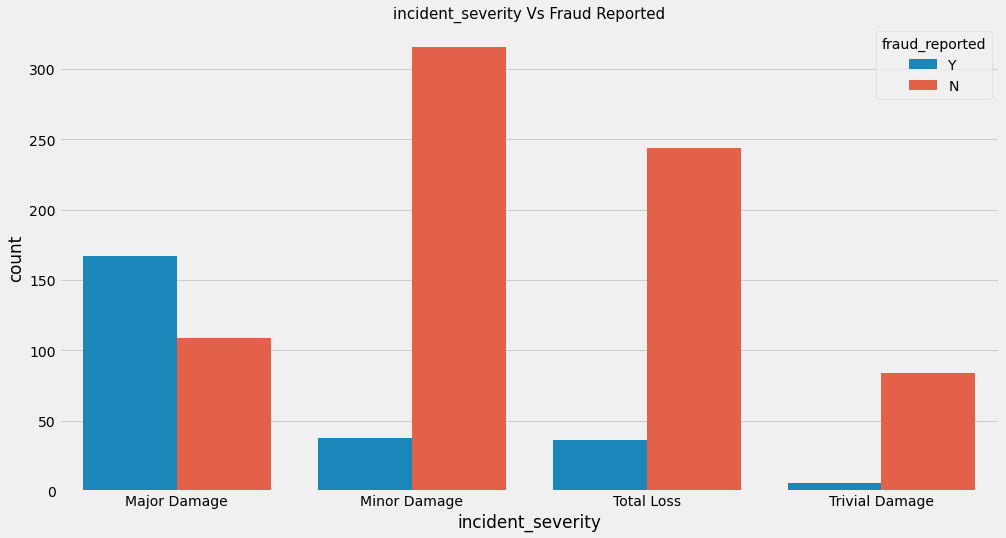

In [23]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(inc['incident_severity'],hue='fraud_reported',data=inc);


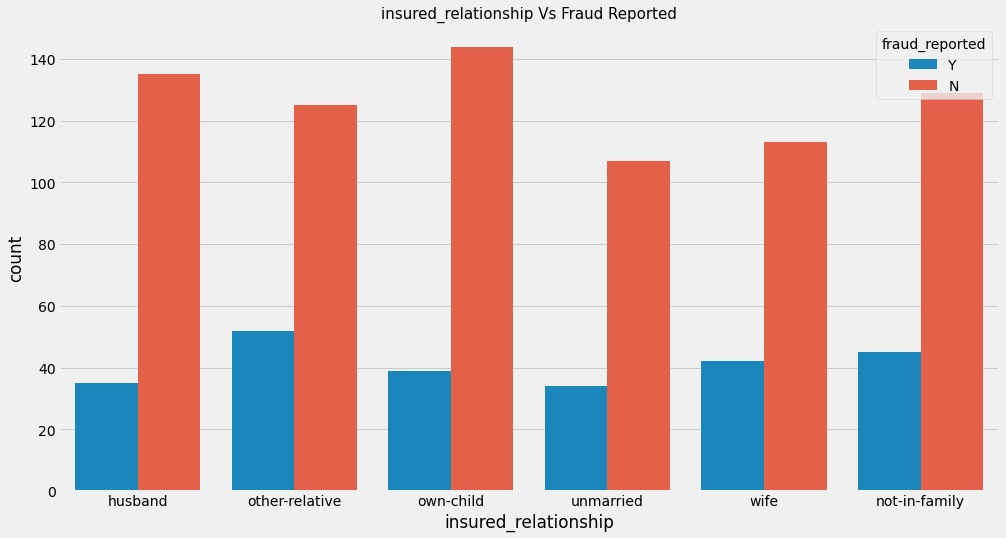

In [24]:
plt.figure(figsize=(15,8))
plt.title('insured_relationship Vs Fraud Reported',fontsize=15)
sns.countplot(inc['insured_relationship'],hue='fraud_reported',data=inc);

# Data Distribution 

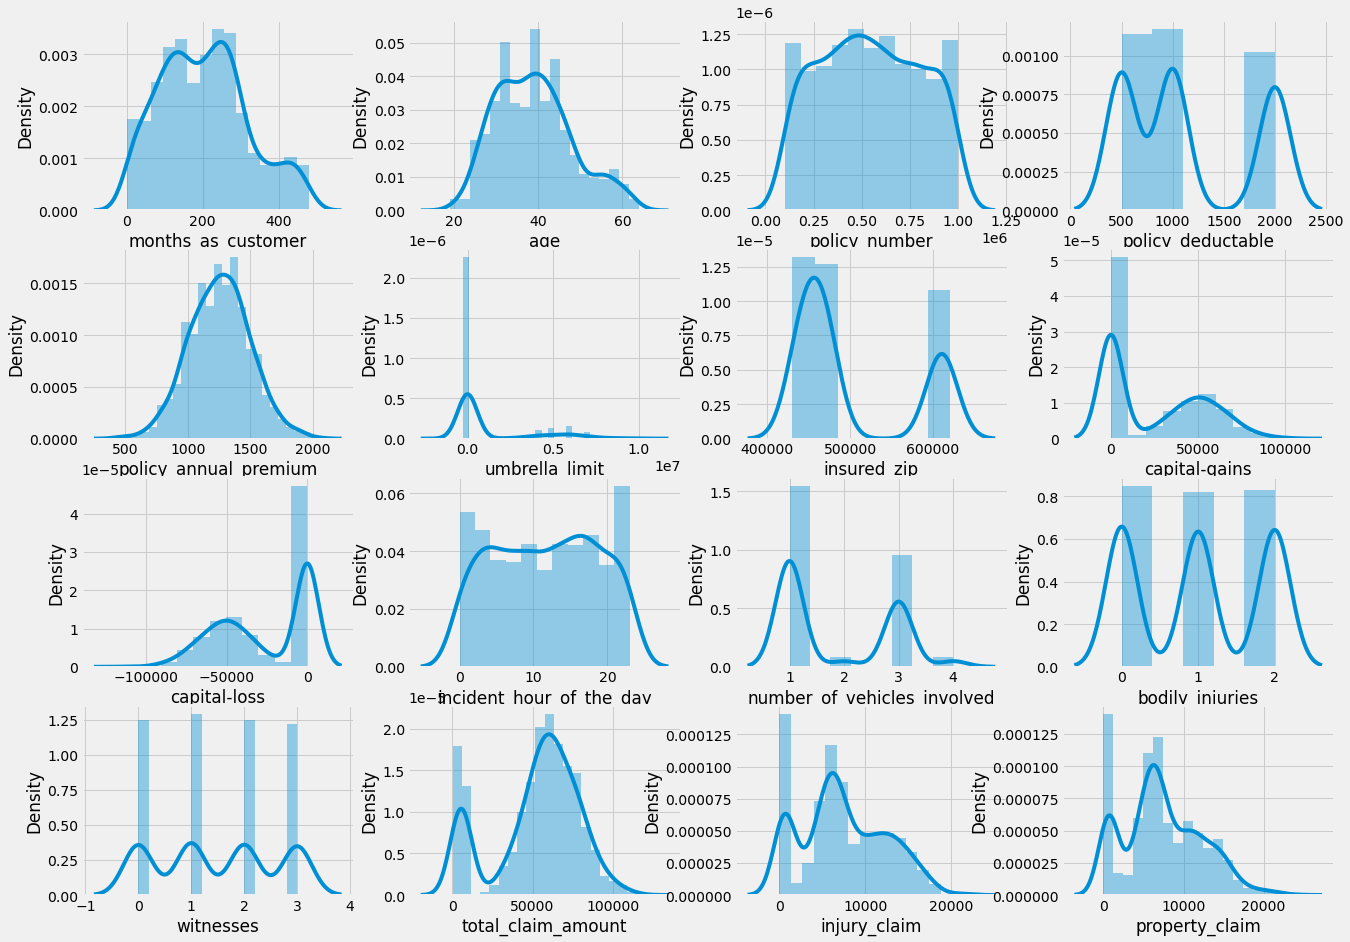

In [25]:
inc1=inc.select_dtypes(exclude='object')
plt.figure(figsize=(20,15))
plot=1
for i in inc1:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(inc[i])
        plot=plot+1
plt.show();

# Outliers Detection

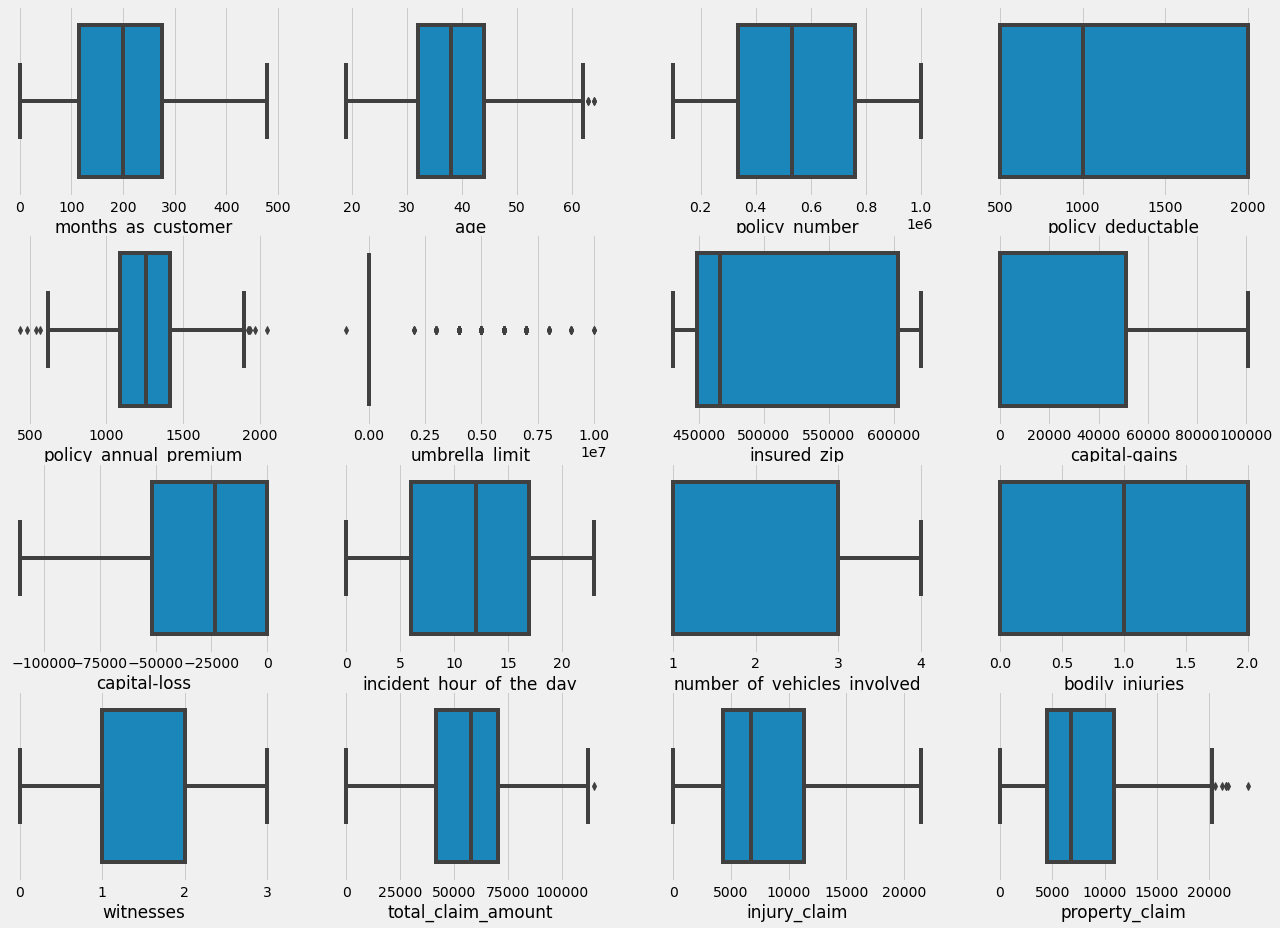

In [26]:
plt.figure(figsize=(20,15))
plot=1
for i in inc1:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.boxplot(inc[i])
        plot=plot+1
plt.show();

No as such outlier detected.

# Checking for Skewness

In [27]:
inc.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in inc:
    inc[i]=le.fit_transform(inc[i])
inc.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,732,1,486,...,2,2,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,396,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,740,5,6,...,3,1,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,743,6,812,...,2,1,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,902,6,850,...,1,1,81,70,36,66,0,31,14,0


# Feature Correlation

In [29]:
inc.corr()['fraud_reported']

months_as_customer             0.017095
age                            0.012143
policy_number                 -0.030222
policy_bind_date               0.060642
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.007620
policy_annual_premium         -0.015261
umbrella_limit                 0.057719
insured_zip                    0.061767
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.021636
capital-loss                  -0.007930
incident_date                 -0.047726
incident_type                 -0.050376
collision_type                 0.110130
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_location             -0.008832


# Correlation with fraud_reported

<AxesSubplot:title={'center':'Correlation with fraud_reported'}>

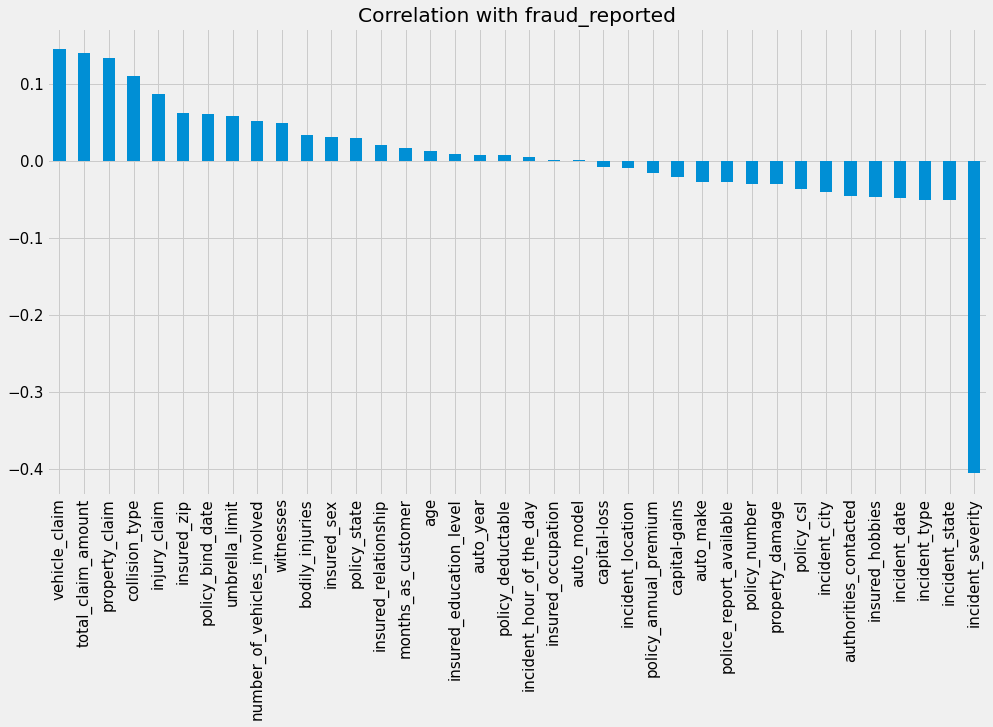

In [30]:
inc.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.bar(figsize=(15,8),grid=True,title='Correlation with fraud_reported',fontsize=15)

# Dropping the target variable

In [31]:
x=inc.drop(['fraud_reported'],axis=1)
y=inc[['fraud_reported']]

# Standard Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

[0.02100994 0.02237221 0.02416169 0.0245771  0.02081614 0.02119624
 0.02129286 0.0227739  0.01871766 0.02716438 0.01625998 0.02234157
 0.0236325  0.03634725 0.023273   0.02276284 0.02010541 0.02249255
 0.0149304  0.02298018 0.1594338  0.02275885 0.02444305 0.02424582
 0.02403936 0.02311055 0.01461788 0.02095185 0.02041394 0.02289606
 0.01936142 0.02543044 0.0247071  0.02740544 0.02784924 0.02288681
 0.02188726 0.02435331]


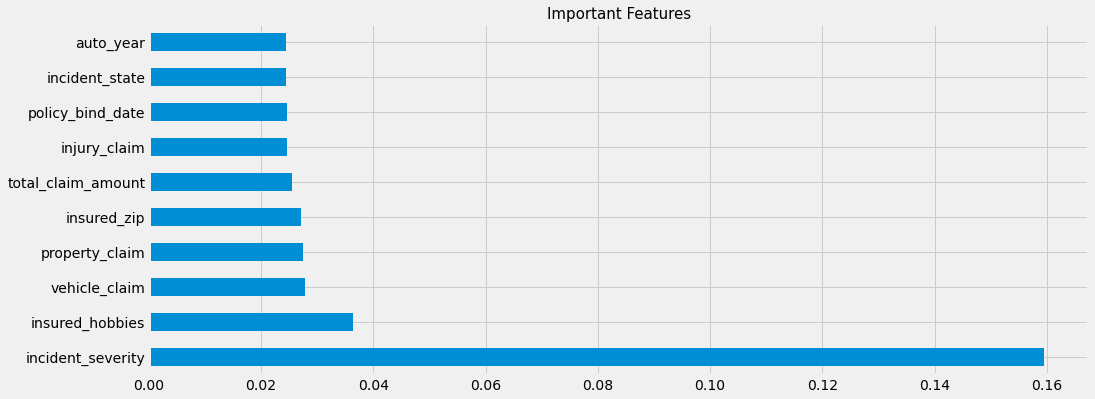

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
ExtraTreesClassifier()
print(extra.feature_importances_)
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

# Model creation

In [34]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [35]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [36]:
def accuracy(clf,x,y):   
    max_accuracy=0
    for i in range(42,100):
        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)
        accuracy_s = accuracy_score(y_test,pred)
        if accuracy_s > max_accuracy:
            max_accuracy = accuracy_s
            result = i
    
    print('max_accuracy_score',result,'is',max_accuracy*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('Confusion_Matrix',confusion_matrix(y_test,pred))
    print('Classification_Report',classification_report(y_test,pred))
    
    print('Roc_auc_Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    
    
    return result

max_accuracy_score 42 is 73.2
cross validation score 74.5
Standard Deviation 0.8366600265340761
Training accuracy 76.4
Test Accuracy 73.2
Confusion_Matrix [[180   0]
 [ 67   3]]
Classification_Report               precision    recall  f1-score   support

           0       0.73      1.00      0.84       180
           1       1.00      0.04      0.08        70

    accuracy                           0.73       250
   macro avg       0.86      0.52      0.46       250
weighted avg       0.80      0.73      0.63       250

Roc_auc_Score 0.5214285714285715





42

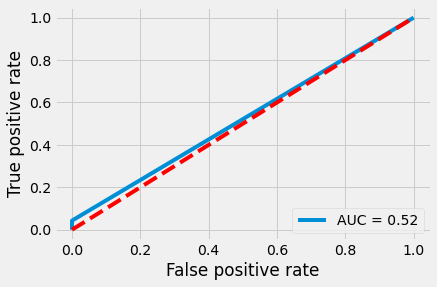

In [37]:
lg=LogisticRegression()
accuracy(lg,x,y)

max_accuracy_score 46 is 79.2
cross validation score 77.3
Standard Deviation 2.596150997149432
Training accuracy 100.0
Test Accuracy 77.2
Confusion_Matrix [[161  19]
 [ 38  32]]
Classification_Report               precision    recall  f1-score   support

           0       0.81      0.89      0.85       180
           1       0.63      0.46      0.53        70

    accuracy                           0.77       250
   macro avg       0.72      0.68      0.69       250
weighted avg       0.76      0.77      0.76       250

Roc_auc_Score 0.6757936507936507





46

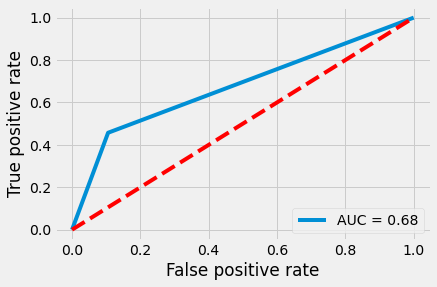

In [38]:
dt=DecisionTreeClassifier()
accuracy(dt,x,y)

max_accuracy_score 42 is 70.39999999999999
cross validation score 69.9
Standard Deviation 2.177154105707722
Training accuracy 78.66666666666666
Test Accuracy 70.39999999999999
Confusion_Matrix [[166  14]
 [ 60  10]]
Classification_Report               precision    recall  f1-score   support

           0       0.73      0.92      0.82       180
           1       0.42      0.14      0.21        70

    accuracy                           0.70       250
   macro avg       0.58      0.53      0.52       250
weighted avg       0.65      0.70      0.65       250

Roc_auc_Score 0.5325396825396825





42

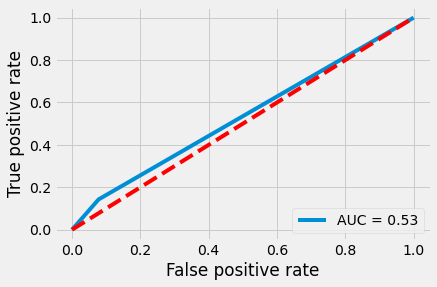

In [39]:
knn=KNeighborsClassifier()
accuracy(knn,x,y)

max_accuracy_score 42 is 72.0
cross validation score 75.29999999999998
Standard Deviation 0.244948974278318
Training accuracy 76.4
Test Accuracy 72.0
Confusion_Matrix [[180   0]
 [ 70   0]]
Classification_Report               precision    recall  f1-score   support

           0       0.72      1.00      0.84       180
           1       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250

Roc_auc_Score 0.5





42

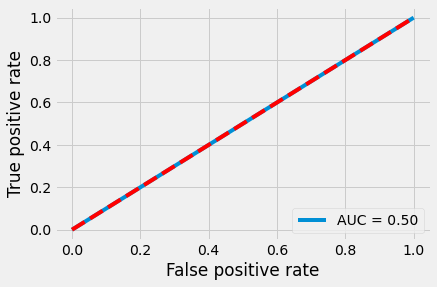

In [40]:
sv=SVC()
accuracy(sv,x,y)

max_accuracy_score 98 is 78.8
cross validation score 76.3
Standard Deviation 1.3928388277184132
Training accuracy 100.0
Test Accuracy 75.2
Confusion_Matrix [[174   6]
 [ 56  14]]
Classification_Report               precision    recall  f1-score   support

           0       0.76      0.97      0.85       180
           1       0.70      0.20      0.31        70

    accuracy                           0.75       250
   macro avg       0.73      0.58      0.58       250
weighted avg       0.74      0.75      0.70       250

Roc_auc_Score 0.5833333333333333





98

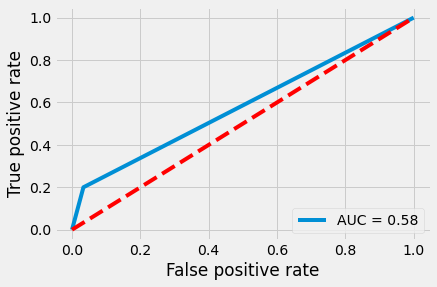

In [41]:
rf=RandomForestClassifier()
accuracy(rf,x,y)

max_accuracy_score 42 is 73.2
cross validation score 79.39999999999999
Standard Deviation 3.307567081708244
Training accuracy 88.53333333333333
Test Accuracy 73.2
Confusion_Matrix [[163  17]
 [ 50  20]]
Classification_Report               precision    recall  f1-score   support

           0       0.77      0.91      0.83       180
           1       0.54      0.29      0.37        70

    accuracy                           0.73       250
   macro avg       0.65      0.60      0.60       250
weighted avg       0.70      0.73      0.70       250

Roc_auc_Score 0.5956349206349205





42

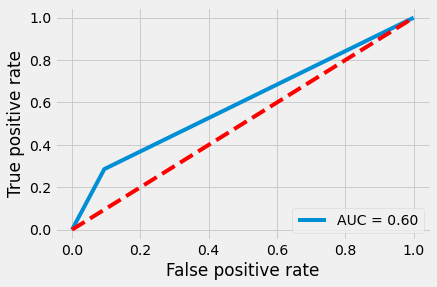

In [42]:
Adb=AdaBoostClassifier()
accuracy(Adb,x,y)

max_accuracy_score 60 is 82.0
cross validation score 83.3
Standard Deviation 1.6248076809271934
Training accuracy 98.53333333333333
Test Accuracy 80.4
Confusion_Matrix [[165  15]
 [ 34  36]]
Classification_Report               precision    recall  f1-score   support

           0       0.83      0.92      0.87       180
           1       0.71      0.51      0.60        70

    accuracy                           0.80       250
   macro avg       0.77      0.72      0.73       250
weighted avg       0.79      0.80      0.79       250

Roc_auc_Score 0.7154761904761905





60

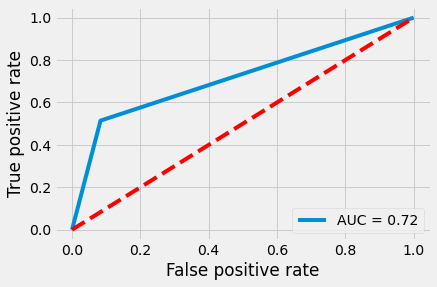

In [43]:
gnb=GradientBoostingClassifier()
accuracy(gnb,x,y)

In [44]:
dt = DecisionTreeClassifier()
grid_param={
       'criterion':['entropy','gini'],
       'max_depth':(10,15),
       'min_samples_split':(10,12),
       'min_samples_leaf':(4,5),
       'max_leaf_nodes':(5,7) }

grd= GridSearchCV(estimator=dt,
                  param_grid=grid_param,
                  cv=5,  
                  n_jobs=-1)
           
            
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

dt=grd.best_estimator_ 
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

dt_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',dt_conf_mat)
print('Accuracy of dt After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
con_mat=>  
 [[164  16]
 [ 23  47]]
Accuracy of dt After Hyperparameter Tuning==>  84.39999999999999


# Save the model

In [45]:
import joblib
joblib.dump(dt,'claim.pkl')

['claim.pkl']

In [46]:
loaded_model=joblib.load('claim.pkl')
prediction=loaded_model.predict(x_test)

# Result.

In [47]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0])